# Plotting slice distribution

*This notebook plots and compares the slice distribution of the three builds.*

The experiment is completed over three builds where fixed positions are defined in the build space. However, because the orientation of the test specimens vary, the slice distribution will differ from one build to the next. In this context, "slice distribution" refer to the distribution of energy throughout the build as defined by the energy input for each layer of powder.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [63]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import transforms
from matplotlib.lines import Line2D

---

## Prepare data

---

In [4]:
"""
Load all data from csv-files into dataframes for further processing.

"""

# The slice distribution of each build
df_b1 = pd.read_csv("data/Slice_distribution_build1.csv", sep=';')
df_b2 = pd.read_csv("data/Slice_distribution_build2.csv", sep=';')
df_b3 = pd.read_csv("data/Slice_distribution_build3.csv", sep=';')

# The slice distribution considering only the main specimens of build 1
df_main = pd.read_csv("data/Slice_distribution_build1_main.csv", sep=';')

# The slice distribution considering perfect spheres in the defined positions
df_sphere = pd.read_csv("data/Slice_distribution_spheres.csv", sep=';')

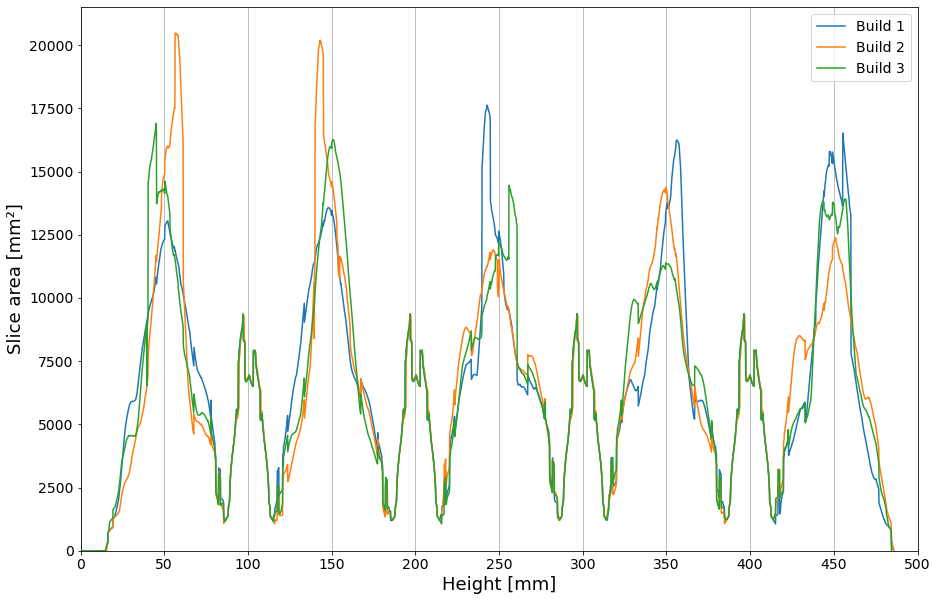

In [5]:
"""
Create figure with the slice distribution of all three builds in a single plot

"""

## Create a single dataframe for all three builds
# Use the first build as a foundation
df = df_b1.rename(columns={"Total slice surface (mmý)": "Build 1"})

# Add the other two build to the dataframe
df.insert(2, "Build 2", df_b2['Total slice surface (mmý)'])
df.insert(3, "Build 3", df_b3['Total slice surface (mmý)'])

# Set the height as index
df.set_index('Height (mm)', inplace=True)

# Reconfigure index name
df.index.rename('Height', inplace=True)


## Define parameters for figure
# Definition for font size
large = 24
medium = 18
small = 14
x_small = 12


## Plot data using matplotlib
# Define the figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

# Create the lineplot
df.plot(ax=ax)

# Customize legend
ax.legend(loc='upper right', title_fontsize=medium, fontsize=small, fancybox=True)

# Set labels for axes
ax.set_ylabel("Slice area [mm²]", fontsize=medium)
ax.set_xlabel("Height [mm]", fontsize=medium)

# Set label size
ax.tick_params(labelsize=small)

# Define the bounds of the axes
ax.set_ybound(lower=0)
ax.set_xbound(lower=0, upper=500)

# Set ticks for every 50 mm height
ax.set_xticks(list(range(0, 501, 50)))

ax.grid(axis='x')


# Display figure
plt.show()

In [6]:
df.head()

,Build 1,Build 2,Build 3
Height,,,
0.06,0.0,0.0,0.0
0.18,0.0,0.0,0.0
0.30,0.0,0.0,0.0
0.42,0.0,0.0,0.0
0.54,0.0,0.0,0.0


In [7]:
for col in df.columns:
    print(df[col].sum())

26558208.834
26566713.291
26567703.183


In [8]:
print(np.linspace(0, 500, 11))

[  0.  50. 100. 150. 200. 250. 300. 350. 400. 450. 500.]


In [9]:
list(range(0, 501, 50))

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

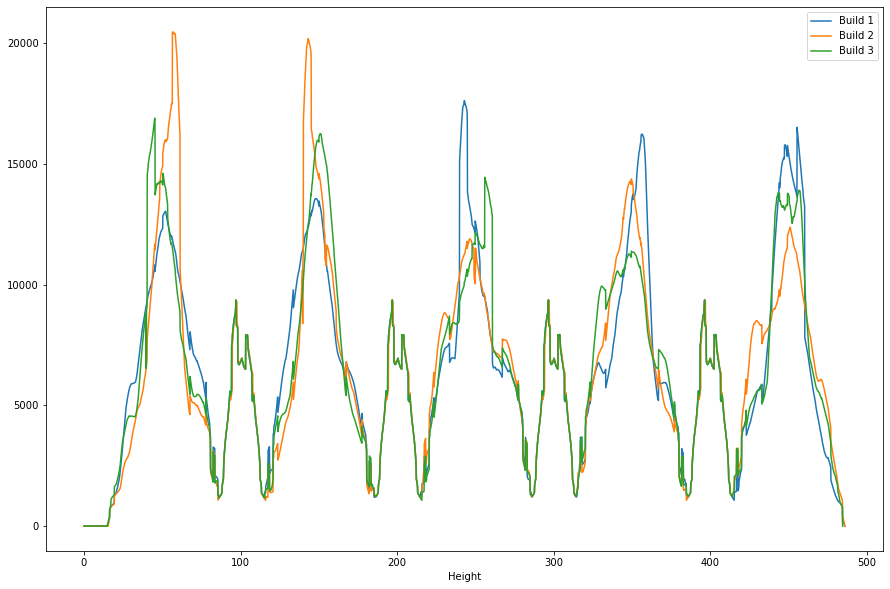

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

df.plot(ax=ax)

plt.show()

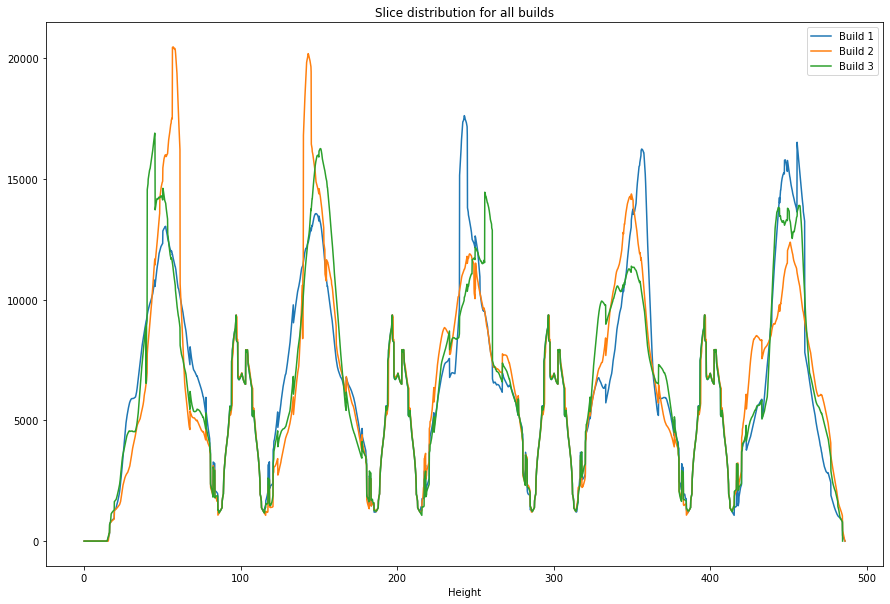

In [11]:
fig, ax = plt.subplots()

df.plot(figsize=(15,10), title="Slice distribution for all builds", ax=ax)

#plt.savefig('Slice_distribution.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

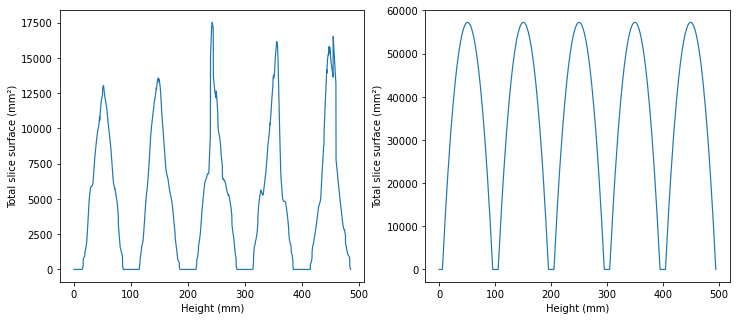

In [12]:
df_main = pd.read_csv("Data/Slice_distribution_build1_main.csv", sep=';')
df_sphere = pd.read_csv("Data/Slice_distribution_spheres.csv", sep=';')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.set_context("paper")

sns.lineplot(data=df_main, x="Height (mm)", y="Total slice surface (mm²)", ax=ax[0])
sns.lineplot(data=df_sphere, x="Height (mm)", y="Total slice surface (mm²)", ax=ax[1])

#plt.savefig('Initial_slice_distribution.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [13]:
len(df_main['Height (mm)'].unique())

4050

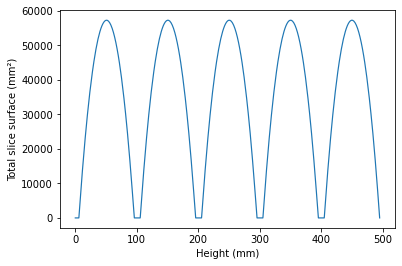

In [55]:
df_sphere = pd.read_csv("Data/Slice_distribution_spheres.csv", sep=';')

fig, ax = plt.subplots()

sns.set_context("paper")

sns.lineplot(data=df_sphere, x="Height (mm)", y="Total slice surface (mm²)", ax=ax)

plt.show()

In [ ]:
df_main = pd.read_csv("Data/Slice_distribution_build1_main.csv", sep=';')

df_main.head()

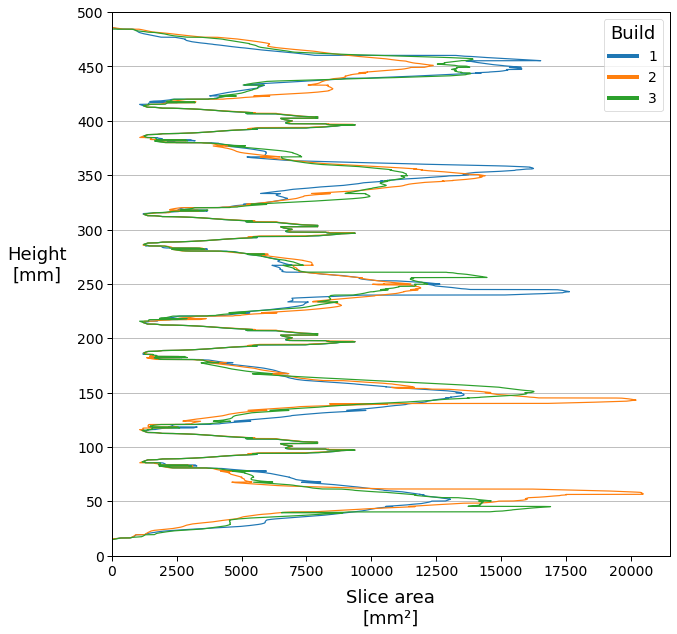

In [90]:
"""
Create figure with the slice distribution of all three builds in a single plot

"""

## Create a single dataframe for all three builds
# Use the first build as a foundation
df = df_b1.rename(columns={"Total slice surface (mmý)": "Build 1"})

# Add the other two build to the dataframe
df.insert(2, "Build 2", df_b2['Total slice surface (mmý)'])
df.insert(3, "Build 3", df_b3['Total slice surface (mmý)'])

# Convert height to negative numbers. This will be reverted later during transform
df['Height (mm)'] = -df['Height (mm)']

# Set the height as index
df.set_index('Height (mm)', inplace=True)


## Define parameters for figure
# Definition for font size
large = 24
medium = 18
small = 14
x_small = 12

# Define colors
colors = ['tab:blue', 'tab:orange', 'tab:green']


## Plot data using matplotlib
# Define the figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Define transformation parameters for plotting data
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)

# Create the lineplot
for i in range(len(df.columns)):
    plt.plot(df.iloc[:,i], color=colors[i], transform=rot + base)


## Configure legend
# Define legend elements
legend_elements = []

for i in range(len(df.columns)):
    legend_elements.append(Line2D([0], [0], color=colors[i], lw=4, label=i+1))

# Create legend with title and elements
ax.legend(title="Build", loc='upper right', title_fontsize=medium, fontsize=small, fancybox=True, handles=legend_elements)


## Configure axes
# Set labels for axes
ax.set_xlabel("Slice area\n[mm²]", fontsize=medium, labelpad=10)
ax.set_ylabel("Height\n[mm]", fontsize=medium, labelpad=40, rotation='horizontal')

# Set label size
ax.tick_params(labelsize=small)

# Define the bounds of the axes
ax.set_xbound(lower=0)
ax.set_ybound(lower=0, upper=500)

# Set ticks for every 50 mm height
ax.set_yticks(list(range(0, 501, 50)))

# Set grid lines for the y-axis
ax.grid(axis='y')


# Save figure
# plt.savefig('plots/04.0_Slice_distribution_all_builds.jpg', dpi=300, bbox_inches='tight')

# Display figure
plt.show()

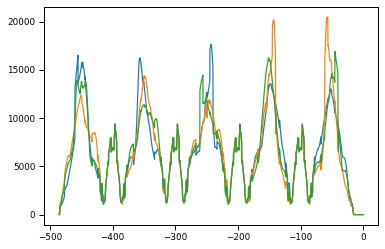

In [87]:
# Create the lineplot
for i in range(len(df.columns)):
    plt.plot(df.iloc[:,i], color=colors[i])